In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcamJpdHRlcmxpY2hcZ2l0aHViXHJsX3N1dHRvbl9iYXJ0bw=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp1252.py": 1728293208.0, "C:\\Users\\jbitterlich\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1728293208.0, "C:\\

In [2]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np

# Define the hidden "success" probabilities for the four arms
arm_probabilities = [0.2, 0.5, 0.7, 0.9]

# Label widget to show your reward messages
message_label = widgets.Label(value="Pull an arm to see your reward!")

# Create four buttons, one for each arm
buttons = [widgets.Button(description=f"Arm {i+1}") for i in range(4)]

text = widgets.Text(
    value="Hello World",
    placeholder="Type something",
    description="String:",
    disabled=False,
)


# Define the button click handler
def on_button_click(b):
    arm_index = buttons.index(b)
    reward = np.random.binomial(n=1, p=arm_probabilities[arm_index])
    # Update the label's text instead of printing
    text.value = f"You pulled Arm {arm_index+1} and got a reward of {reward}."


# Attach the click event to each button
for btn in buttons:
    btn.on_click(on_button_click)


# Display the buttons and the label
display(widgets.VBox([widgets.HBox(buttons), text]))

In [3]:
import ipywidgets as widgets

test_label = widgets.Label("Hello from a label!")
test_label

Label(value='Hello from a label!')

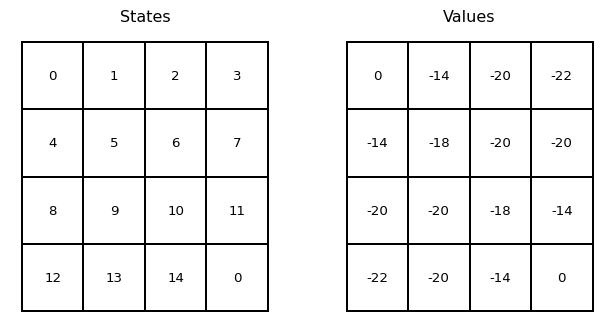

In [4]:
#| label: fig-gridworld
#| fig-cap: left 4×4 Gridworld states, right values for the equiprobable random policy
#| code-fold: true
import matplotlib.pyplot as plt

states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 0]
values = [0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, 0]


def draw_grid(ax, labels, title):
    """Draws a 4×4 grid with the given labels."""
    for x in range(5):
        ax.plot([0, 4], [x, x], "k-")  # Horizontal lines
        ax.plot([x, x], [0, 4], "k-")  # Vertical lines

    for i, label in enumerate(labels):
        row, col = divmod(i, 4)
        ax.text(col + 0.5, 3.5 - row, str(label), ha="center", va="center")

    ax.set_title(title)
    ax.axis("off")


def draw_gridworld():
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))

    draw_grid(axes[0], states, "States")
    draw_grid(axes[1], values, "Values")

    plt.show()


draw_gridworld()

In [5]:
# | code-fold: true
states = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
values = [0, -14, -20, -22, -14, -18, -20, -20, -20, -20, -18, -14, -22, -20, -14, -20]


def neighbours(state):
    # up
    if state in [1, 2, 3]:
        up = state
    elif state == 15:
        up = 13
    else:
        up = state - 4

    # down
    if state in [12, 14, 15]:
        down = state
    elif state == 11:
        down = 0
    elif state == 13:
        down = 15
    else:
        down = state + 4

    # left
    if state in [4, 8, 12]:
        left = state
    elif state == 15:
        left = 12
    else:
        left = state - 1

    # right
    if state in [3, 7, 11]:
        right = state
    elif state == 15:
        right = 14
    elif state == 14:
        right = 0
    else:
        right = state + 1

    return up, down, left, right


# Iterative value update process
sweeps = 0
while True:
    delta = 0  # Track the largest change
    sweeps += 1

    for state in range(1, 16):  # Skip state 0
        old_value = values[state]

        # full backup
        up, down, left, right = neighbours(state)
        values[state] = (
            values[up] + values[down] + values[left] + values[right]
        ) / 4 - 1

        delta = max(delta, abs(old_value - values[state]))

    if delta < 0.01:  # Convergence criterion
        break

print("new values after sweeps", sweeps)
print(values)

new values after sweeps 1
[0, -14.0, -20.0, -22.0, -14.0, -18.0, -20.0, -20.0, -20.0, -20.0, -18.0, -14.0, -22.0, -20.0, -14.0, -20.0]


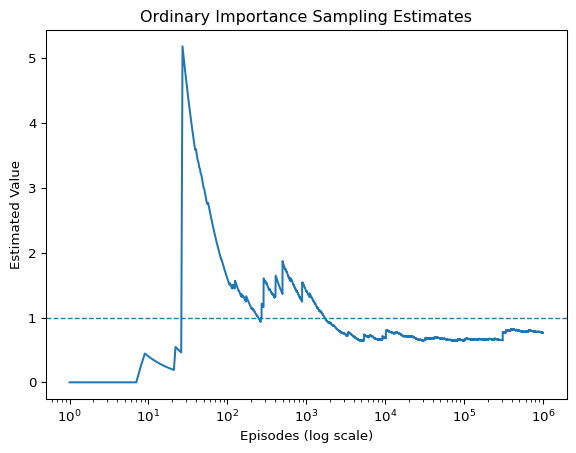

In [6]:
# | code-fold: true

import random
import matplotlib.pyplot as plt

# Define actions and policies
actions = ["left", "right"]
target_policy = {"left": 1.0, "right": 0.0}
behaviour_policy = {"left": 0.5, "right": 0.5}

# Calculate sampling ratios for ordinary importance sampling
sampling_ratio = {
    action: target_policy[action] / behaviour_policy[action] for action in actions
}

# Number of episodes
num_episodes = 1_000_000

estimated_value = 0.0
estimates = []

for i in range(1, num_episodes + 1):
    # Importance sampling ratio for this episode
    imp_samp_ratio = 1.0

    while True:
        if random.random() < behaviour_policy["left"]:
            imp_samp_ratio *= sampling_ratio["left"]
            if random.random() < 0.1:
                reward, episode_over = (1, True)
            else:
                reward, episode_over = (0, False)
        else:
            imp_samp_ratio *= sampling_ratio["right"]
            reward, episode_over = (0, False)

        if episode_over:
            scaled_return = reward * imp_samp_ratio
            estimated_value += (scaled_return - estimated_value) / i
            estimates.append(estimated_value)
            break

plt.figure()
plt.plot(range(1, num_episodes + 1), estimates)
# plt.ylim(0, 2)
plt.axhline(y=1.0, linestyle="--", linewidth=1)
plt.xscale("log")
plt.xlabel("Episodes (log scale)")
plt.ylabel("Estimated Value")
plt.title("Ordinary Importance Sampling Estimates")
plt.show()

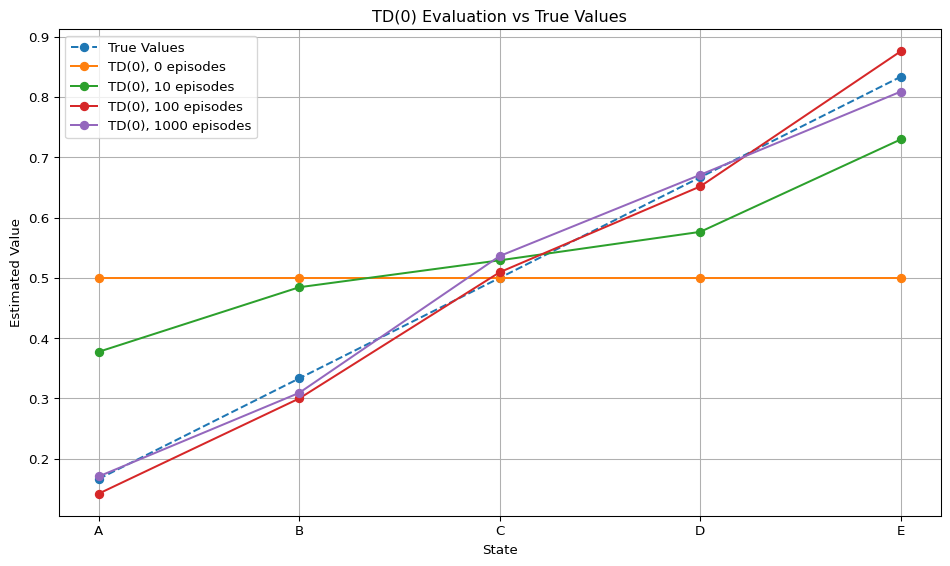

In [7]:
import matplotlib.pyplot as plt
import random

# Define states
states = ["A", "B", "C", "D", "E"]
terminal_state = "T"
start_state = "C"
terminal_left = 0
terminal_right = 6
state_to_index = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5}
index_to_state = {v: k for k, v in state_to_index.items()}

# True values for comparison
true_values = {"A": 1 / 6, "B": 2 / 6, "C": 3 / 6, "D": 4 / 6, "E": 5 / 6}


def take_step(state):
    index = state_to_index[state]
    next_index = index + random.choice([-1, 1])
    if next_index in (terminal_left, terminal_right):
        reward = 1 if next_index == terminal_right else 0
    else:
        reward = 0
    return (index_to_state.get(next_index, terminal_state), reward)


def temporal_difference_0(num_episodes, alpha=0.1, gamma=1.0):
    evaluation = {state: 0.5 for state in states}
    evaluation[terminal_state] = 0.0

    for _ in range(num_episodes):
        s0 = start_state
        while s0 != terminal_state:
            s1, r = take_step(s0)
            evaluation[s0] += alpha * (r + gamma * evaluation[s1] - evaluation[s0])
            s0 = s1
    return evaluation


# Run evaluations for different episode counts
episode_counts = [0, 10, 100, 1000]
results = {count: temporal_difference_0(count) for count in episode_counts}

# Plot results
plt.figure(figsize=(10, 6))
x = range(len(states))

# True values
true_vals = [true_values[state] for state in states]
plt.plot(x, true_vals, label="True Values", linestyle="--", marker="o")

# TD(0) estimates
for count in episode_counts:
    y = [results[count][state] for state in states]
    plt.plot(x, y, label=f"TD(0), {count} episodes", marker="o")

plt.xticks(x, states)
plt.xlabel("State")
plt.ylabel("Estimated Value")
plt.title("TD(0) Evaluation vs True Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()